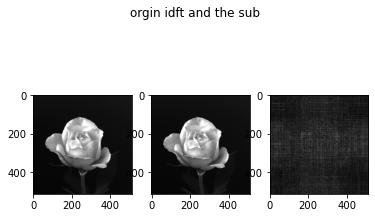

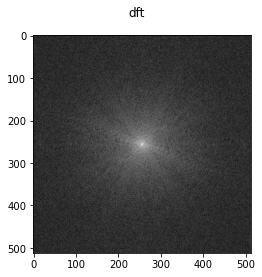

In [5]:
import numpy as np
from ImageProcess import ImageProcess

ImageP = ImageProcess()

def solution1(): 
    """对图像进行傅里叶变换
    """
    image = ImageP.covert_img_to_array("input/rose512.tif")/255
    dft2 = ImageP.dft2D(image, shift=True)
    idft = ImageP.idft2D(dft2, shift=True)
    sub = abs(image - idft)
    ImageP.show_img("orgin idft and the sub",[image,idft,sub],['gray']*3,col=3)
    ImageP.show_dft2D_in_2D("dft",dft2)
solution1()

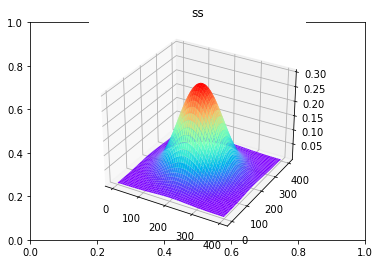

In [6]:
def solution2():
    """展示高斯变换的dft 3d图
    """
    kernel = ImageP.gauss_2d_kernel(1,m=400)
    a = ImageP.dft2D(kernel,True)
    ImageP.show_dft2D_in_3D("ss",a,True)
solution2()

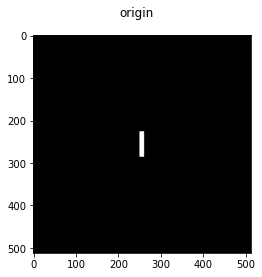

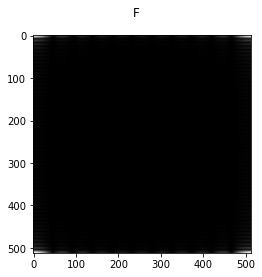

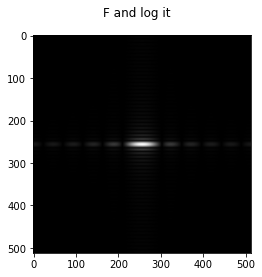

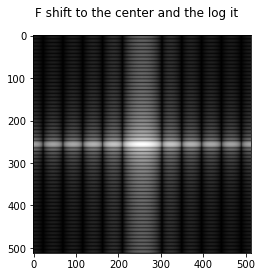

In [7]:
def solution3():
    ImageP = ImageProcess()
    image = np.zeros((512,512))
    image[226:286,250:261] = 255
    image = image/255
    dft2 = ImageP.dft2D(image, shift=False)
    dft2_shift = ImageP.dft2D(image, shift=True)
    ImageP.show_img("origin",[image],['gray'])
    ImageP.show_dft2D_in_2D("F",dft2,False) # 傅里叶变换
    ImageP.show_dft2D_in_2D("F and log it",dft2_shift,False) # 傅里叶变换
    ImageP.show_dft2D_in_2D("F shift to the center and the log it",dft2_shift,True) # 中心化傅里叶变换
solution3()

/home/xiaohui/anaconda3/envs/data_mining/lib/python3.8/site-packages/imageio/plugins/_tifffile.py:4275: UserWarning: 999 is not a valid EXTRASAMPLE
  warnings.warn(str(e))


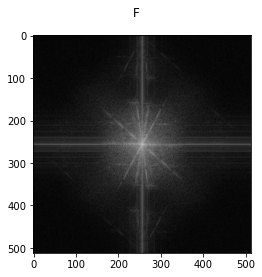

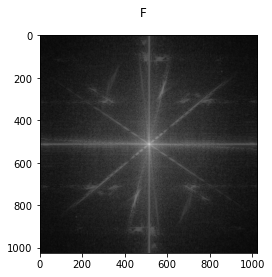

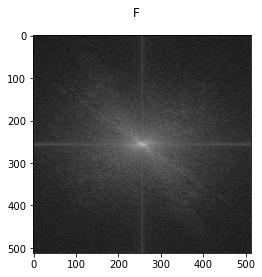

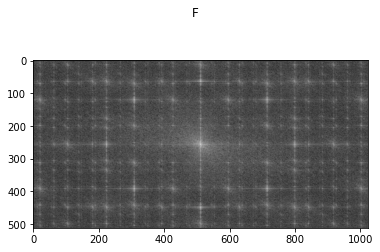

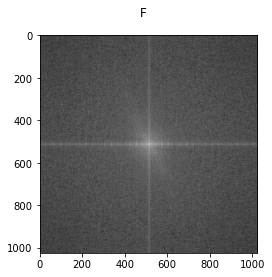

In [8]:
def padding_image2power(img_path):
    
    image = ImageP.covert_img_to_array(img_path)
    if len(image.shape) > 2:
        image = image[:,:,0]
    image = image.reshape(image.shape[0], image.shape[1],1)

    image_w = image.shape[0]
    image_h = image.shape[1]
    fit_w = ImageP.find2power(image_w)
    fit_h = ImageP.find2power(image_h)
    padding_w = int((fit_w-image_w)/2)
    padding_h = int((fit_h - image_h)/2)

    image_pad = np.zeros((fit_w,fit_h,1))
    image_pad[padding_w:image_w+padding_w,padding_h:image_h+padding_h,:] = image
    return image_pad

for i in ["input/house.tif","input/house02.tif","input/lena_gray_512.tif","input/lunar_surface.tif","input/Characters_test_pattern.tif"]:
    image = padding_image2power(i)/255
    dft2 = ImageP.dft2D(image,True)
    ImageP.show_dft2D_in_2D("F",dft2,True) # 对数变换中心化

